## Summary of this notebook:

### This notebook uses the data and code from the course curriculum 2.2.6.  I added some keywords to try and reduce the number of mislabeled points and also added a new feature called 'ex_marks' that signals a spam message if it has multiple exclamation points without spaces in between. 

In [91]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

In [93]:
sms_raw.head(n=30)
#print(len(sms_raw))

df_spam = sms_raw.loc[sms_raw['spam'] == 'spam']


In [94]:
df_spam.head(n=50)

,spam,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [95]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent', 'win','U']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [96]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

In [97]:
sms_raw['ex_marks'] = sms_raw.message.str.contains(str('!!' or '!!!' or '!!!!' or '!!!!!'))

In [98]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
# Note that if you run this cell a second time everything will become false.
# So... Don't.

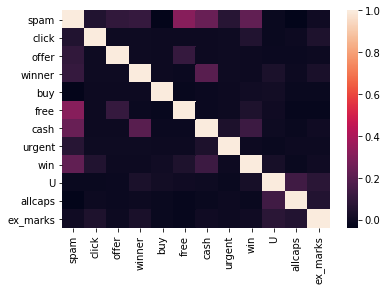

In [99]:
sns.heatmap(sms_raw.corr())

In [100]:
data = sms_raw[keywords + ['allcaps'] + ['ex_marks']]
target = sms_raw['spam']

In [101]:
from sklearn.naive_bayes import BernoulliNB


In [102]:
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

In [103]:
# Fit our model to the data.
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [104]:
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [105]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 5572 points : 576


## Conclusion:

### The original number of mislabeled points was 604.  The new feature 'ex_marks' did not reduce this 604 number as hypothesized.  However, when I added the word 'win' to the keywords list, this reduced the mislabeled points to 576.  I also tried to add just one exclamation point to the ex_marks feature and acutally got an increase in mislabeling to 577, so I removed this feature.  Lastly, I tried adding 'U' to the keywords list and did not see a change in the mislabeling.